In [11]:
import pandas as pd


plain = pd.read_csv("results/plain.csv")
# native = pd.read_csv("results/opt3.csv")
# invsum = pd.read_csv("results/invsum.csv")
# ur2 = pd.read_csv("results/unroll2.csv")
ur4 = pd.read_csv("results/unroll4.csv")
fm = pd.read_csv("results/fastmath.csv")
avx_mb = pd.read_csv("results/avx_mask_blend.csv")
avx = pd.read_csv("results/avx.csv")

df = plain
df.rename(columns={"time": "plain"}, inplace=True)
df["plain"] = df["plain"] * 1e6
# df["native"] = native["time"] * 1e6
# df["no-deps"] = invsum["time"] * 1e6
# df["unroll2"] = ur2["time"] * 1e6
df["manual-opts + O3"] = ur4["time"] * 1e6
df["fast-math"] = fm["time"] * 1e6
df["AVX-mask"] = avx_mb["time"] * 1e6
df["AVX-max"] = avx["time"] * 1e6
df

,elements,plain,manual-opts + O3,fast-math,AVX-mask,AVX-max
0,128,6.37442,6.19252,6.44678,1.28248,0.81358
1,256,8.47352,7.56728,6.39900,1.95418,1.68662
2,512,12.05410,9.92114,7.63282,4.08238,2.68240
3,1024,18.25870,16.71890,10.34640,6.31536,4.68160
4,2048,31.97580,25.61980,16.61910,11.44910,7.78894
5,4096,59.10110,46.44780,23.15510,22.72510,15.86630
6,8192,110.95000,89.14720,37.24960,43.34240,29.26790
7,16384,222.00100,173.79500,70.26050,83.85570,55.76260


In [12]:
print(df.to_latex(header=True, index=False, float_format="%.4f"))
df

\begin{tabular}{rrrrrr}
\toprule
elements & plain & manual-opts + O3 & fast-math & AVX-mask & AVX-max \\
\midrule
128 & 6.3744 & 6.1925 & 6.4468 & 1.2825 & 0.8136 \\
256 & 8.4735 & 7.5673 & 6.3990 & 1.9542 & 1.6866 \\
512 & 12.0541 & 9.9211 & 7.6328 & 4.0824 & 2.6824 \\
1024 & 18.2587 & 16.7189 & 10.3464 & 6.3154 & 4.6816 \\
2048 & 31.9758 & 25.6198 & 16.6191 & 11.4491 & 7.7889 \\
4096 & 59.1011 & 46.4478 & 23.1551 & 22.7251 & 15.8663 \\
8192 & 110.9500 & 89.1472 & 37.2496 & 43.3424 & 29.2679 \\
16384 & 222.0010 & 173.7950 & 70.2605 & 83.8557 & 55.7626 \\
\bottomrule
\end{tabular}



,elements,plain,manual-opts + O3,fast-math,AVX-mask,AVX-max
0,128,6.37442,6.19252,6.44678,1.28248,0.81358
1,256,8.47352,7.56728,6.39900,1.95418,1.68662
2,512,12.05410,9.92114,7.63282,4.08238,2.68240
3,1024,18.25870,16.71890,10.34640,6.31536,4.68160
4,2048,31.97580,25.61980,16.61910,11.44910,7.78894
5,4096,59.10110,46.44780,23.15510,22.72510,15.86630
6,8192,110.95000,89.14720,37.24960,43.34240,29.26790
7,16384,222.00100,173.79500,70.26050,83.85570,55.76260


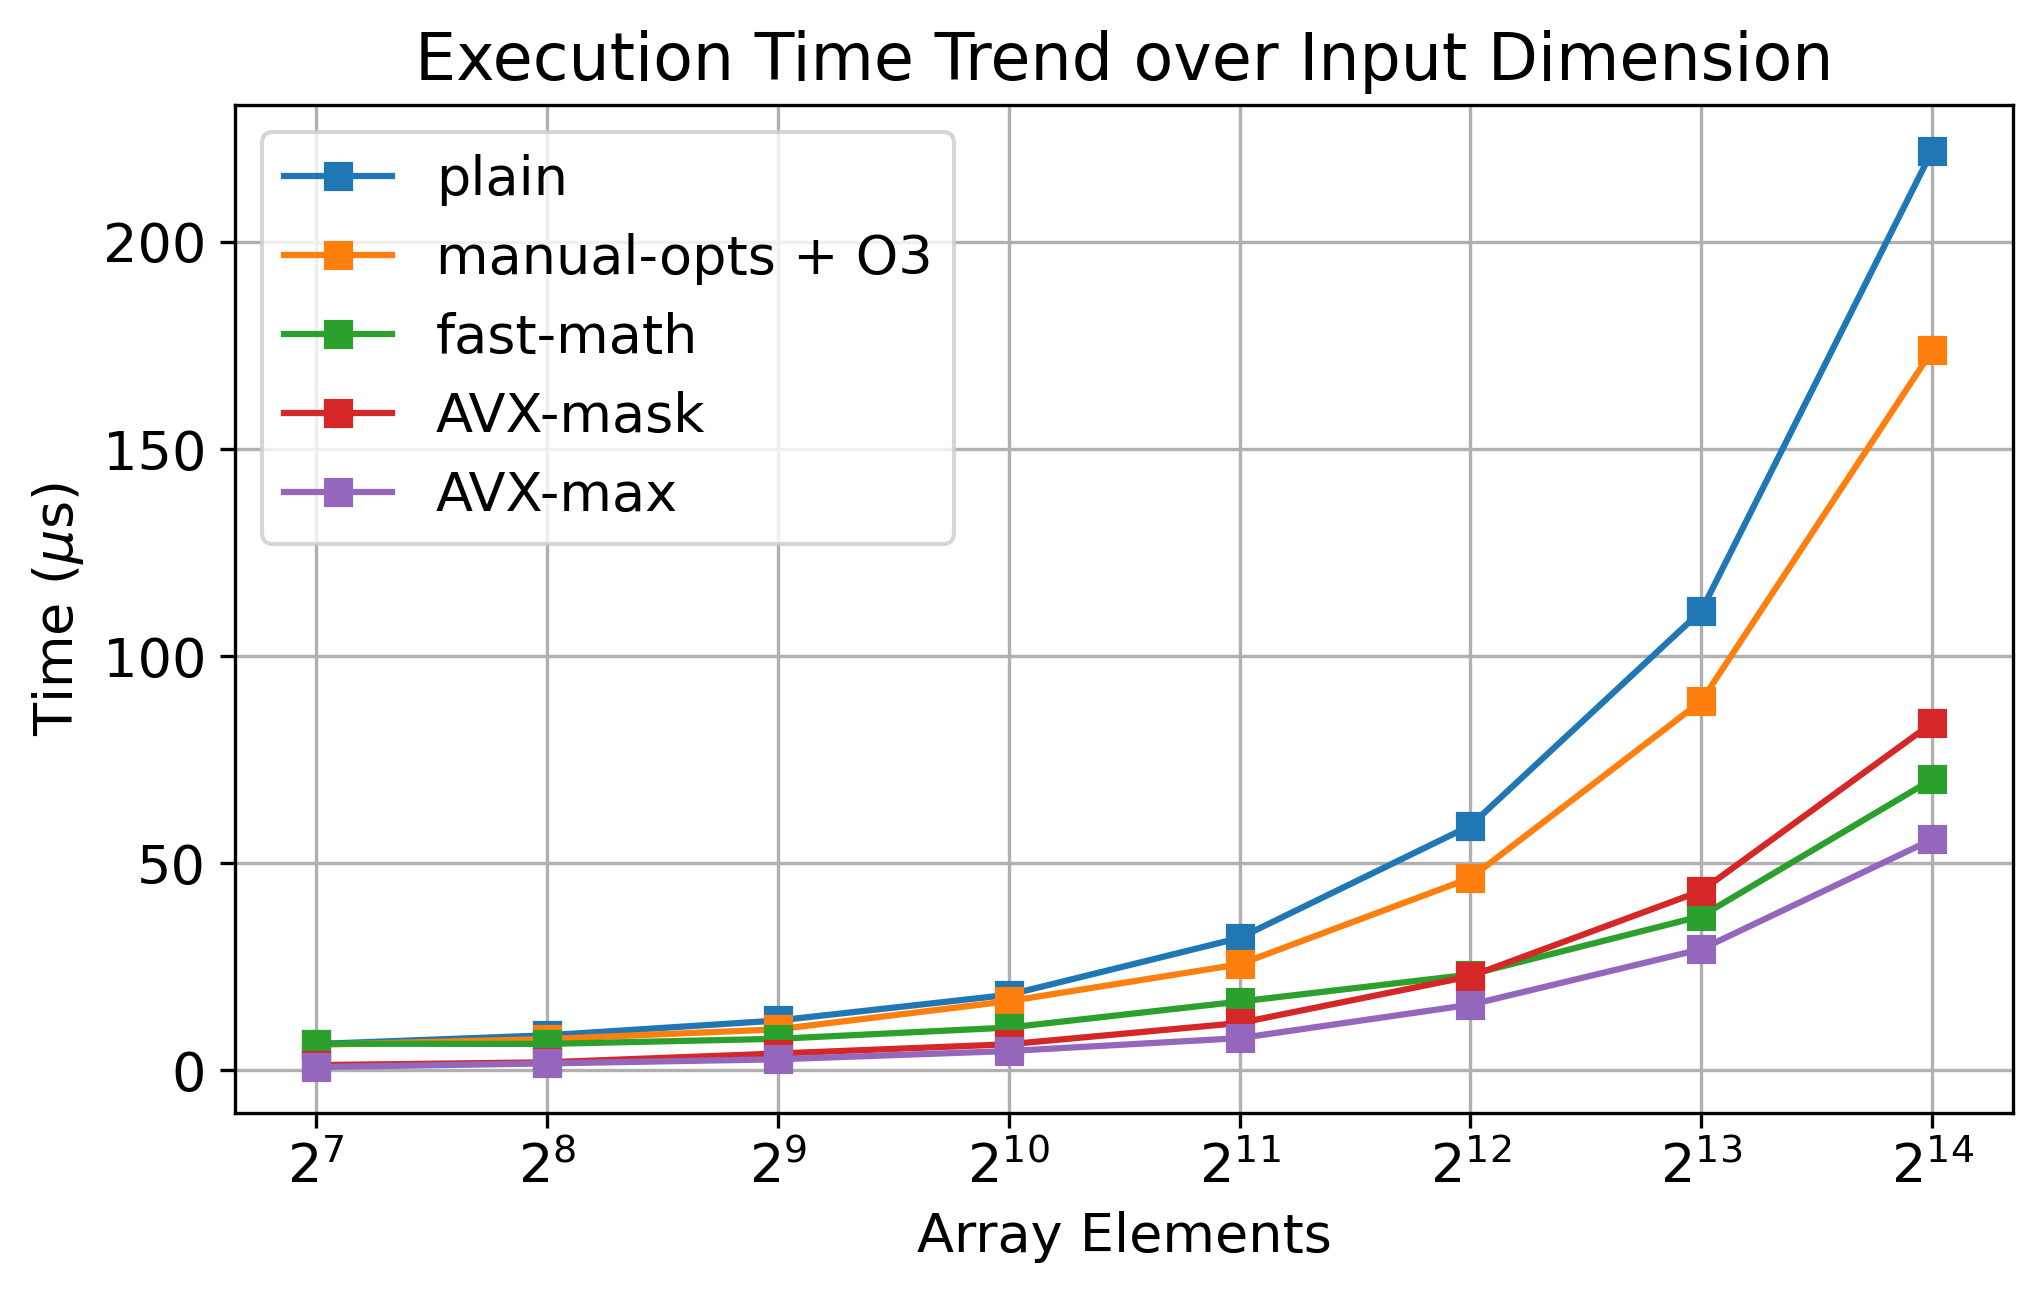

In [13]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({"font.size": 13})


plt.figure(figsize=(7, 4.5), dpi=300)
plt.title("Execution Time Trend over Input Dimension")

labels = [c for c in df.columns if c != "elements"]
for label in labels:
    plt.plot(df["elements"], df[label], marker="s", label=label)

plt.xlabel("Array Elements")
plt.ylabel(r"Time ($\mu$s)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("report/time.svg")
plt.show()

In [14]:
speedup_df = df.copy()
for c in speedup_df.columns:
    if c != "elements":
        speedup_df[c] = df["plain"] / df[c]

print(speedup_df.to_latex(header=True, index=False, float_format="%.4f"))
speedup_df

\begin{tabular}{rrrrrr}
\toprule
elements & plain & manual-opts + O3 & fast-math & AVX-mask & AVX-max \\
\midrule
128 & 1.0000 & 1.0294 & 0.9888 & 4.9704 & 7.8350 \\
256 & 1.0000 & 1.1198 & 1.3242 & 4.3361 & 5.0240 \\
512 & 1.0000 & 1.2150 & 1.5792 & 2.9527 & 4.4938 \\
1024 & 1.0000 & 1.0921 & 1.7647 & 2.8912 & 3.9001 \\
2048 & 1.0000 & 1.2481 & 1.9240 & 2.7929 & 4.1053 \\
4096 & 1.0000 & 1.2724 & 2.5524 & 2.6007 & 3.7249 \\
8192 & 1.0000 & 1.2446 & 2.9786 & 2.5598 & 3.7908 \\
16384 & 1.0000 & 1.2774 & 3.1597 & 2.6474 & 3.9812 \\
\bottomrule
\end{tabular}



,elements,plain,manual-opts + O3,fast-math,AVX-mask,AVX-max
0,128,1.0,1.029374,0.988776,4.970386,7.835025
1,256,1.0,1.119758,1.324194,4.336100,5.023965
2,512,1.0,1.214991,1.579246,2.952714,4.493774
3,1024,1.0,1.092099,1.764739,2.891157,3.900098
4,2048,1.0,1.248089,1.924039,2.792866,4.105283
5,4096,1.0,1.272420,2.552401,2.600697,3.724945
6,8192,1.0,1.244571,2.978555,2.559849,3.790843
7,16384,1.0,1.277373,3.159684,2.647417,3.981181


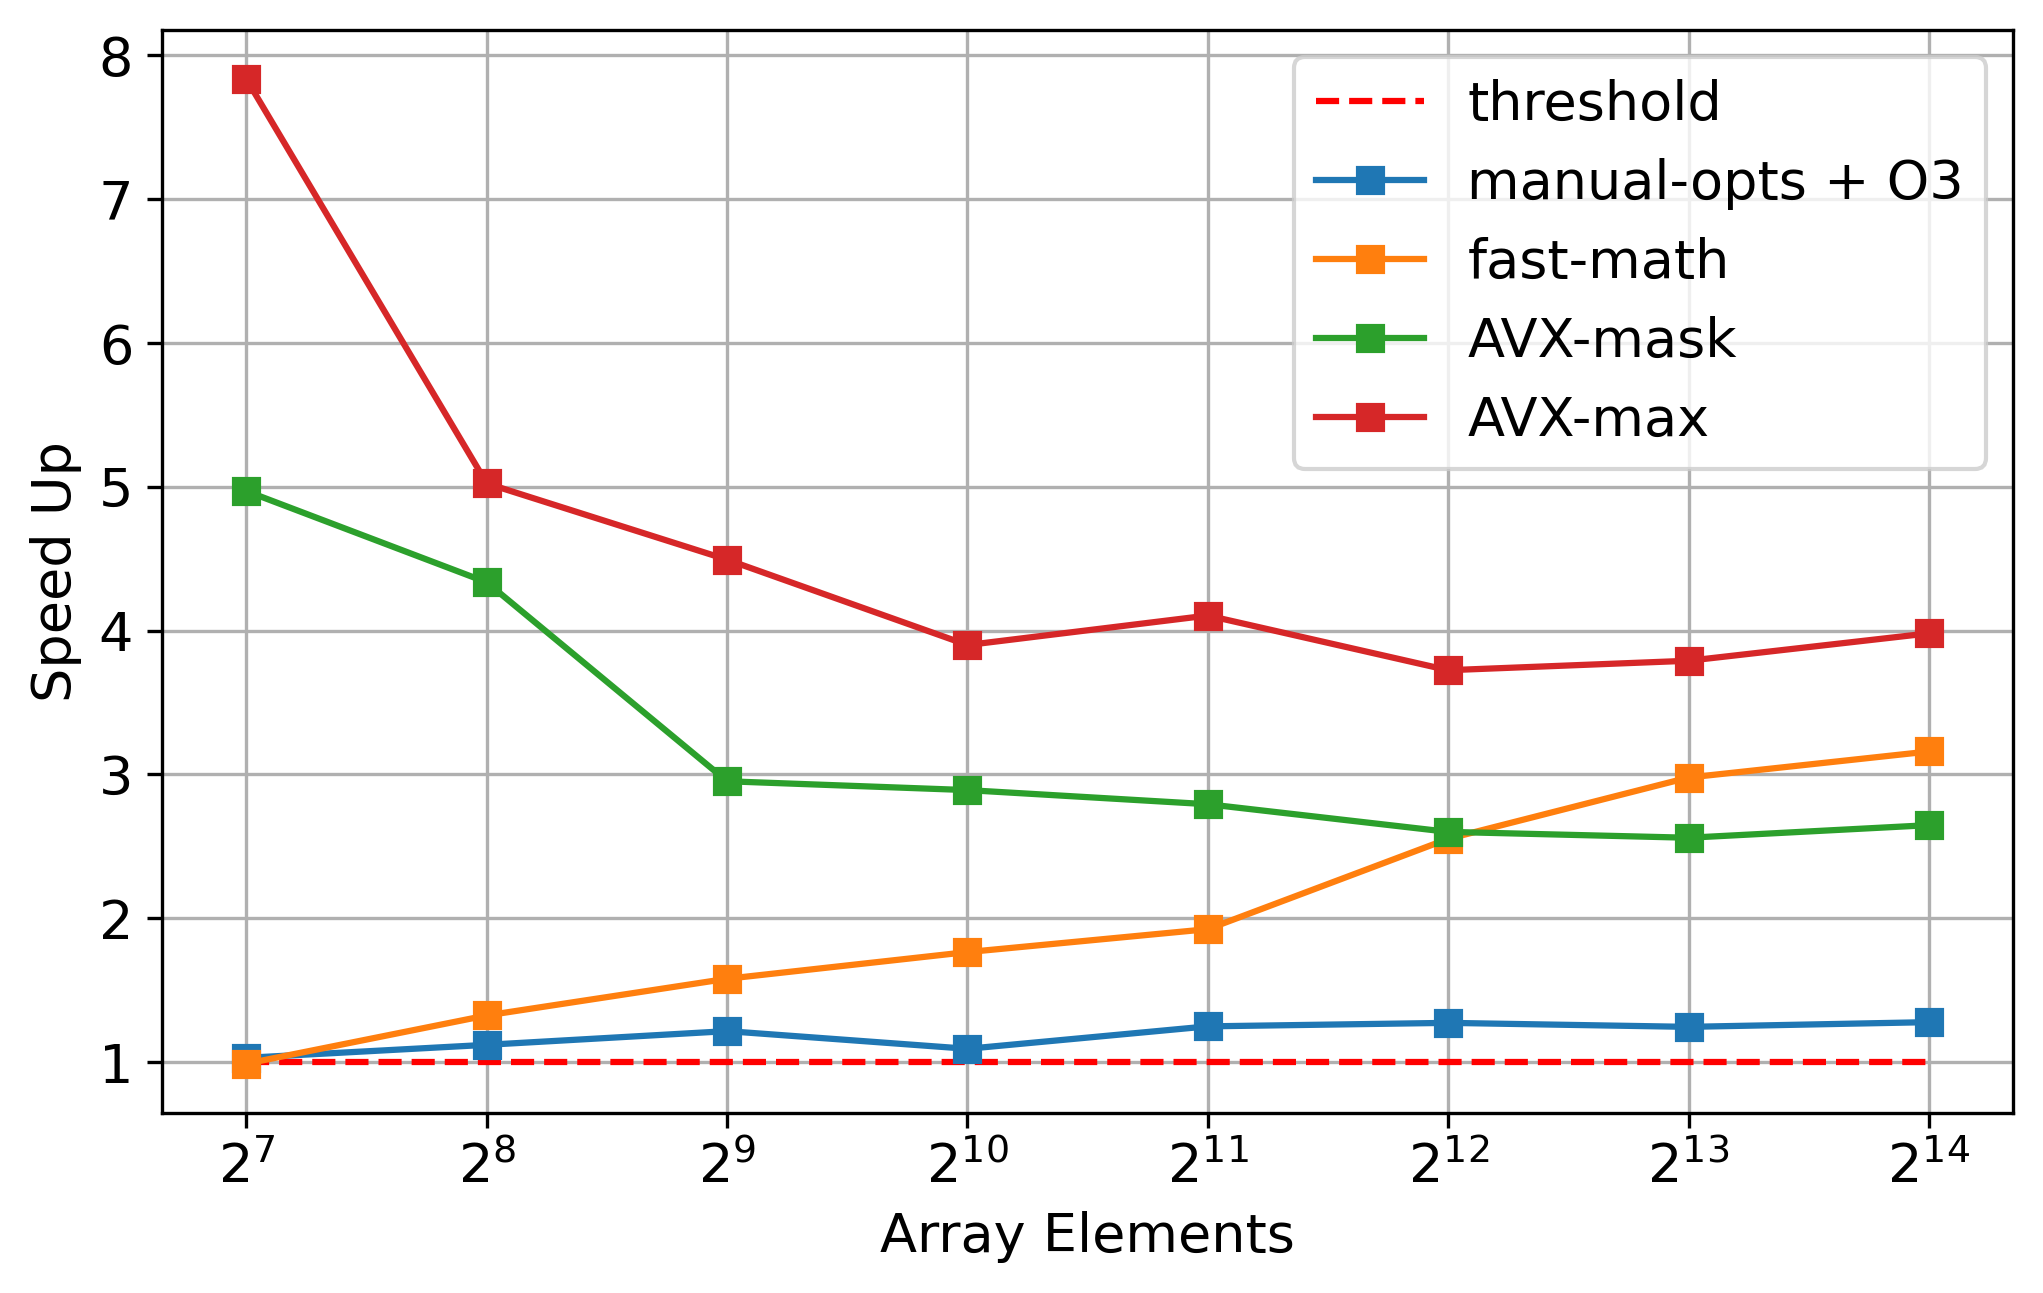

In [15]:
plt.figure(figsize=(7, 4.5), dpi=300)
# plt.title("Speed Up Trend over Input Dimension")

# threshold of good speed up
plt.plot([128, 16384], [1.0, 1.0], "r--", label="threshold")

for label in labels:
    if label != "plain":
        plt.plot(speedup_df["elements"], speedup_df[label], marker="s", label=label)

plt.xlabel("Array Elements")
plt.ylabel("Speed Up")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("report/speed_up.svg")
plt.show()